В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [37]:
x = [1, 3, 4]
print(sum(x))
print([i**2 for i in x])
print([(i-1)**2 for i in x])

8
[1, 9, 16]
[0, 4, 9]


**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [43]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [174]:
import numpy as np
print('with python:', sum(sum_purchases) / len(sum_purchases))
print('with numpy:', np.mean(sum_purchases))

with python: 667.95
with numpy: 667.95


**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [106]:
print('with python:', (sorted(sum_purchases)[len(sum_purchases)//2 - 1] + sorted(sum_purchases)[len(sum_purchases)//2]) / 2 )
print('with numpy:', np.median(sum_purchases))

with python: 319.0
with numpy: 319.0


**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [148]:
sum_purchases_mean = sum(sum_purchases) / len(sum_purchases)
sum_purchases_minus_mean = [(i - sum_purchases_mean)**2 for i in sum_purchases]
var_purchases_std = (sum(sum_purchases_minus_mean) / (len(sum_purchases) - 1))**0.5

print(var_purchases_std)
print(np.std(sum_purchases, ddof=1))

1124.5433447451132
1124.5433447451132


**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [122]:
ages = [16, 17, 18, 20]
student_cnt = [10, 25, 20, 2]
print(np.average(ages, weights=student_cnt))

17.280701754385966


**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [170]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [237]:
visits_mean = sum(visits) / len(visits)
visits_minus_mean = [(i - visits_mean)**2 for i in visits]
var_visits_std = (sum(visits_minus_mean) / (len(visits) - 1))**0.5

vp = [ (visits[i] - visits_mean) * (sum_purchases[i] - sum_purchases_mean) for i in range(len(visits)) ]
cov_vp = sum(vp) / (len(visits) - 1)

print(cov_vp / (var_purchases_std * var_visits_std))
print(np.corrcoef(visits,sum_purchases))

-0.30265844687666454
[[ 1.         -0.30265845]
 [-0.30265845  1.        ]]


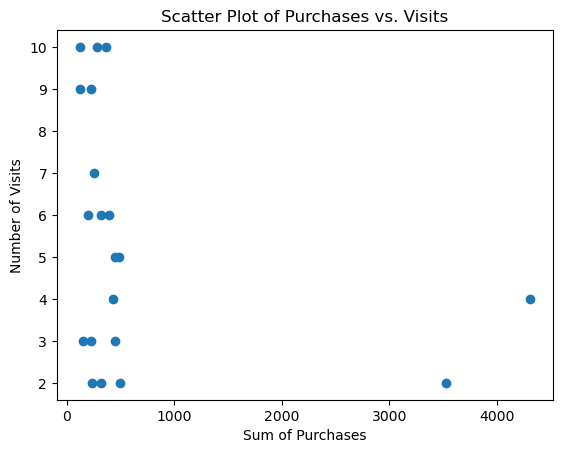

In [239]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Висновок - спостерігається наявність даних у вибірці, які спотворюють результат. Потрібно вхідну вибірку "почистини" для точнішого аналізу

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

[[ 1.         -0.36852121]
 [-0.36852121  1.        ]]


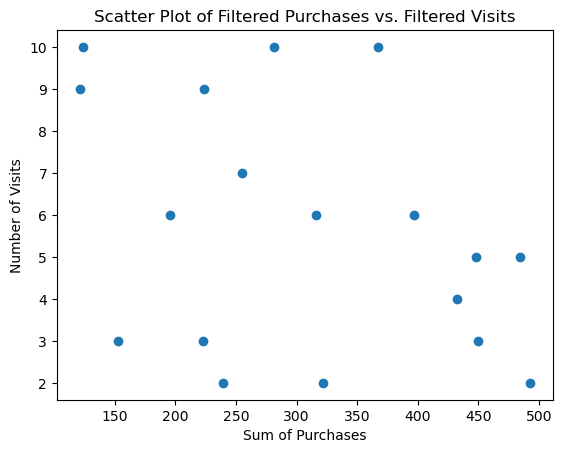

In [266]:
purchases_std = np.std(sum_purchases, ddof=1)
threshold = visits_mean + (purchases_std + purchases_std)
filtered_visits = []
filtered_sum_purchases = []

for v, sp in zip(visits, sum_purchases):
    if sp <= threshold:
        filtered_visits.append(v)
        filtered_sum_purchases.append(sp)
print(np.corrcoef(filtered_visits,filtered_sum_purchases))

plt.scatter(filtered_sum_purchases, filtered_visits)
plt.title('Scatter Plot of Filtered Purchases vs. Filtered Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Висновок - відсутня кореляція